<a href="https://colab.research.google.com/github/prat-man/CSE-575-Statistical-Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [19]:
seed = 0

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/prat-man/CSE-575-Statistical-Machine-Learning/main/data/features_30_sec.csv')

In [21]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [22]:
df.drop(['filename'], axis=1, inplace=True)

In [23]:
X = df.loc[:, df.columns != 'label']
y = df.loc[:, df.columns == 'label']

In [24]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)
labels = encoder.categories_[0]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [27]:
model = Sequential()

model.add(Input(X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=10)

Epoch 1/10
60/60 [==============================] - 2s 7ms/step - loss: 1.5207 - accuracy: 0.4450 - val_loss: 1.2802 - val_accuracy: 0.5350
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 0.8182 - accuracy: 0.7017 - val_loss: 1.0761 - val_accuracy: 0.6400
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 0.5421 - accuracy: 0.8183 - val_loss: 1.0679 - val_accuracy: 0.6250
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3490 - accuracy: 0.8883 - val_loss: 1.0244 - val_accuracy: 0.6900
Epoch 5/10
60/60 [==============================] - 0s 5ms/step - loss: 0.2377 - accuracy: 0.9250 - val_loss: 1.2608 - val_accuracy: 0.6550
Epoch 6/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9517 - val_loss: 1.3097 - val_accuracy: 0.6450
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.1520 - accuracy: 0.9483 - val_loss: 1.2220 - val_accuracy: 0.6850
Epoch 8/10
60/60 [==

In [30]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 1.3555 - accuracy: 0.7300
Test Accuracy: 0.7300000190734863


7/7 [==============================] - 0s 3ms/step


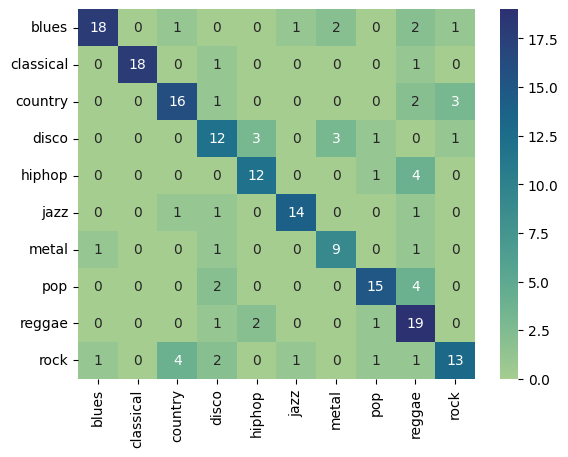

In [31]:
y_pred = model.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

conf_m = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_m, cmap='crest', annot=True)

plt.xticks(ticks = np.arange(0.5, 10, 1), labels=labels, rotation=90)
plt.yticks(ticks = np.arange(0.5, 10, 1), labels=labels,rotation=0)

plt.savefig('ANN_Confusion_Matrix.png', dpi=300)

In [32]:
accuracy = np.trace(conf_m) / np.sum(conf_m)
print(f'Overall accuracy = {accuracy}')

Overall accuracy = 0.73


In [33]:
accuracy_df = pd.DataFrame(columns=['accuracy'])

class_acc = conf_m.diagonal() / conf_m.sum(axis=1)
for i in range(len(labels)):
    accuracy_df.loc[labels[i]] = [round(class_acc[i], 2)]

accuracy_df

,accuracy
blues,0.72
classical,0.90
country,0.73
disco,0.60
hiphop,0.71
jazz,0.82
metal,0.75
pop,0.71
reggae,0.83
rock,0.57


In [34]:
model.save('ANN.h5')